In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
# Load MNIST dataset from Scikit-learn
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
# Normalize pixel values to range [0, 1]
X = X / 255.0
# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define LeNet architecture using TensorFlow/Keras
model = tf.keras.Sequential([
tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(120, activation='relu'),
tf.keras.layers.Dense(84, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',

loss='categorical_crossentropy',
metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
350/350 [==============================] - 20s 52ms/step - loss: 0.3571 - accuracy: 0.8974 - val_loss: 0.1143 - val_accuracy: 0.9648
Epoch 2/10
350/350 [==============================] - 18s 51ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.0829 - val_accuracy: 0.9722
Epoch 3/10
350/350 [==============================] - 18s 51ms/step - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 4/10
350/350 [==============================] - 20s 56ms/step - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0582 - val_accuracy: 0.9819
Epoch 5/10
350/350 [==============================] - 20s 56ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0506 - val_accuracy: 0.9835
Epoch 6/10
350/350 [==============================] - 18s 51ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0451 - val_accuracy: 0.9863
Epoch 7/10
350/350 [==============================] - 19s 56ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0435 - val_accuracy:

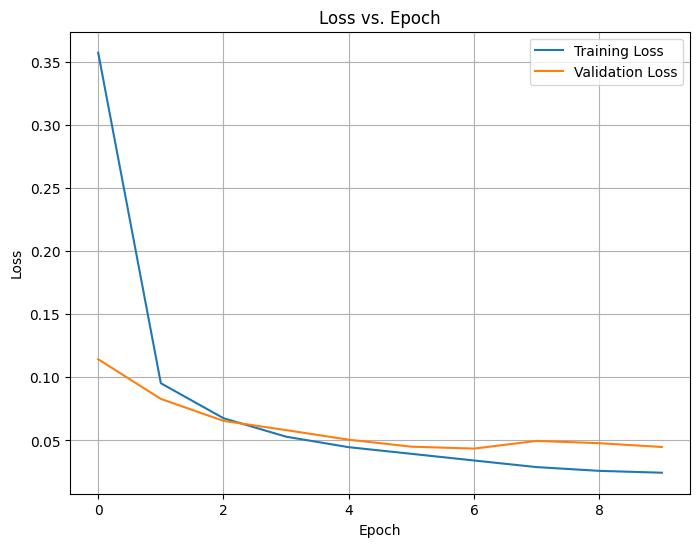

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()